# Case 1: Ligações para o 911

Para este projeto estaremos analisando alguns dados de chamadas para o 911 do [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Os dados contém os seguintes campos:

* `lat`: Variável String, Latitude
* `lng`: Variável String, Longitude
* `desc`: Variável String, Descrição da Chamada de Emergência
* `zip`: Variável String, CEP
* `title`: Variável String, Título
* `timeStamp`: Variável String, AAAA-MM-DD HH: MM:SS
* `twp`: Variável String, Township
* `addr`: Variável String, Endereço
* `e`: Variável String, variável Dummy (sempre 1)

Simplesmente acompanhe este notebook e tente completar as instruções ou responder as perguntas em negrito usando suas habilidades Python e Data Science!

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/7a9cfedf-d065-4a1b-8e71-50bd68c69ad2.csv) para fazer o download do dataset.

## Dados e Configuração

**Importar numpy e pandas**

In [1]:
import numpy as np
import pandas as pd

**Importe as bibliotecas de visualização gráfica.**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Leia o arquivo csv como um dataframe chamado df**

In [3]:
df = pd.read_csv('911.csv')

**Verifique a info() do df**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

**Verifique o cabeçalho do df**

In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Perguntas básicas

**Quais são os top 5 CEPs nas chamadas 911?**

In [8]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**Quais são os 5 principais municípios nas chamadas 911?**

In [9]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**Dê uma olhada na coluna 'title'. Quantos códigos de título exclusivos existem?**

In [13]:
df['title'].unique().size

110

In [14]:
len(df['title'].unique())

110

In [15]:
df['title'].unique().shape[0]

110

In [16]:
df['title'].nunique()

110

## Criando novos recursos

**Na coluna "title" existem "Razões / Departamentos" especificados antes do código do título. Estes são "EMS", "Fire" e "Traffic". Use `.apply()` com uma expressão lambda personalizada para criar uma nova coluna chamada "Código" que contém esse valor de string.**

**Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason seria EMS.**

In [21]:
df['title'][0]

'EMS: BACK PAINS/INJURY'

In [20]:
df['title'][0].split(':')[0]

'EMS'

In [23]:
def get_title_code(title):
    return title.split(':')[0]

df['title'].apply(get_title_code)

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [24]:
get_title_code = lambda x: x.split(':')[0]

df['title'].apply(get_title_code)

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [25]:
df['title'].apply(lambda x: x.split(':')[0])

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [28]:
df['Code'] = df['title'].apply(lambda title: title.split(':')[0])

**Qual é o motivo mais comum para uma chamada do 911 com base nessa nova coluna?**

In [29]:
df['Code'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Code, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

**Agora use Seaborn para criar um countplot de chamadas 911 baseadas nesta nova coluna.**

<AxesSubplot:xlabel='Code', ylabel='count'>

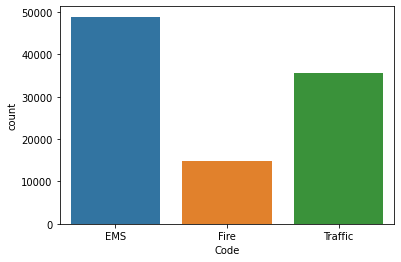

In [30]:
sns.countplot(data=df, x='Code')

<AxesSubplot:xlabel='Code', ylabel='count'>

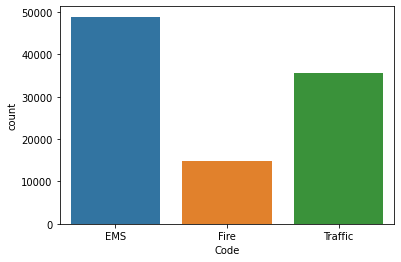

In [33]:
sns.countplot(x=df['Code'])

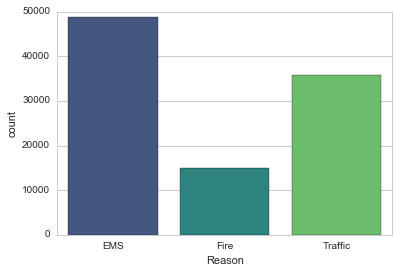

In [34]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Code
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [36]:
df['timeStamp'].nunique()

72577

### Atividade Complementar

Crie uma nova coluna (chamada `"date"`, por exemplo), que contenha apenas a data da coluna `timeStamp` do dataset. Em seguida, transforme os dados dessa coluna para um objeto `datetime`. Por fim, visualize a quantidade de chamadas feitas nesse intervalo. Analise, também, a quantidade de chamadas diárias, considerando cada um dos códigos.

> Realize a análise utilizando o Matplotlib, Seaborn e Plotly.

# Case 2: Titanic
---

Realize uma análise de dados sobre o dataset do Titanic. Para isso, como sugestão, você pode:

1. Aplicar um tratamento nos dados ausentes.
2. Analisar as métricas da estatística descritiva.
3. Realizar uma análise gráfica dos dados.
4. Extrair insigths a partir da análise das estatísticas de mortes/sobrevivência.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv) para fazer o download do dataset.